In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:

dataset_train = pd.read_csv('vcb_2009_2018.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:

# Thuc hien scale du lieu gia ve khoang 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Tao du lieu train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))




In [6]:

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.summary()
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [7]:

if path.exists("mymodel.h5"):
    regressor.load_weights("mymodel.h5")
else:
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel.h5")

Epoch 1/100
73/73 [==============================] - 36s 13ms/step - loss: 0.0370
Epoch 2/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 3/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0042
Epoch 4/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0041
Epoch 5/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 6/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 7/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0032
Epoch 8/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 9/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 10/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 11/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0025
Epoch 12/100
73/73 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 13/100
73/73 [====

In [8]:

dataset_test = pd.read_csv('vcb_2019.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

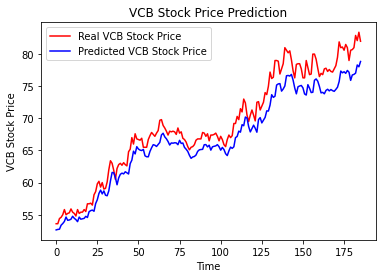

In [9]:

dataset_total = pd.concat((dataset_train['CLOSE'], dataset_test['CLOSE']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()






# Mục mới